# Shipment Pricing Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

- You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

### 2)  Import Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the CSV Data as Pandas DataFrame**

In [82]:
df = pd.read_csv('../data/train.csv')

**Show Top 5 Records**

In [3]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
df[df['Cost']<0]

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,fffe3600310033003300,Paula Myron,0.83,15.0,8.0,7239.0,Brass,31.11,86.26,No,Yes,Yes,Airways,No,Working Class,No,06/08/19,06/08/19,"North Richardton, NY 07675",-1970.41
3354,fffe3500300035003100,Teresa Mckenzie,NaN,30.0,10.0,NaN,Marble,1854.78,56.30,No,No,Yes,Roadways,No,Working Class,No,08/08/16,08/05/16,"Mcdonaldville, SD 09100",-3034.09
4580,fffe3500320031003000,Garry Smith,0.30,47.0,18.0,1996390.0,NaN,4523.83,31.65,No,Yes,Yes,NaN,Yes,Wealthy,No,06/29/15,07/01/15,"West Julieville, CA 81125",-36503.29
5808,fffe3500310034003000,Larry Porter,0.80,54.0,24.0,5074949.0,Marble,27750.60,78.67,No,Yes,Yes,Roadways,Yes,Wealthy,Yes,05/27/17,05/27/17,"Lauraville, AL 82939",-236681.06


**Shape of the dataset**

In [5]:
df.shape

(6500, 20)

**Summary of the dataset**

In [6]:
# Display summary statistics for a dataframe
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


### Statistical Inferences
- Median Price Of Sculpture is 1192.
- 25% of the population is Price Of Sculpture below 5
- Average Artist Reputation of the population is 0.46

* The difference between 75th percentile and Max also suggests the skewness 

* We can confirm the insights we got from data distribution, as skewness is more for Height, Width, and Base Shipping Price, and skewness of Weight, Price of Sculpture because of Outliers 

**Check Datatypes in the dataset**

In [7]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

## 3. EXPLORING DATA

**Most of the features seems to be of object data type, Now let's seperate Categorical and numerical columns**

In [8]:
target_feature = 'Cost'

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 7 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']

We have 13 categorical features : ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

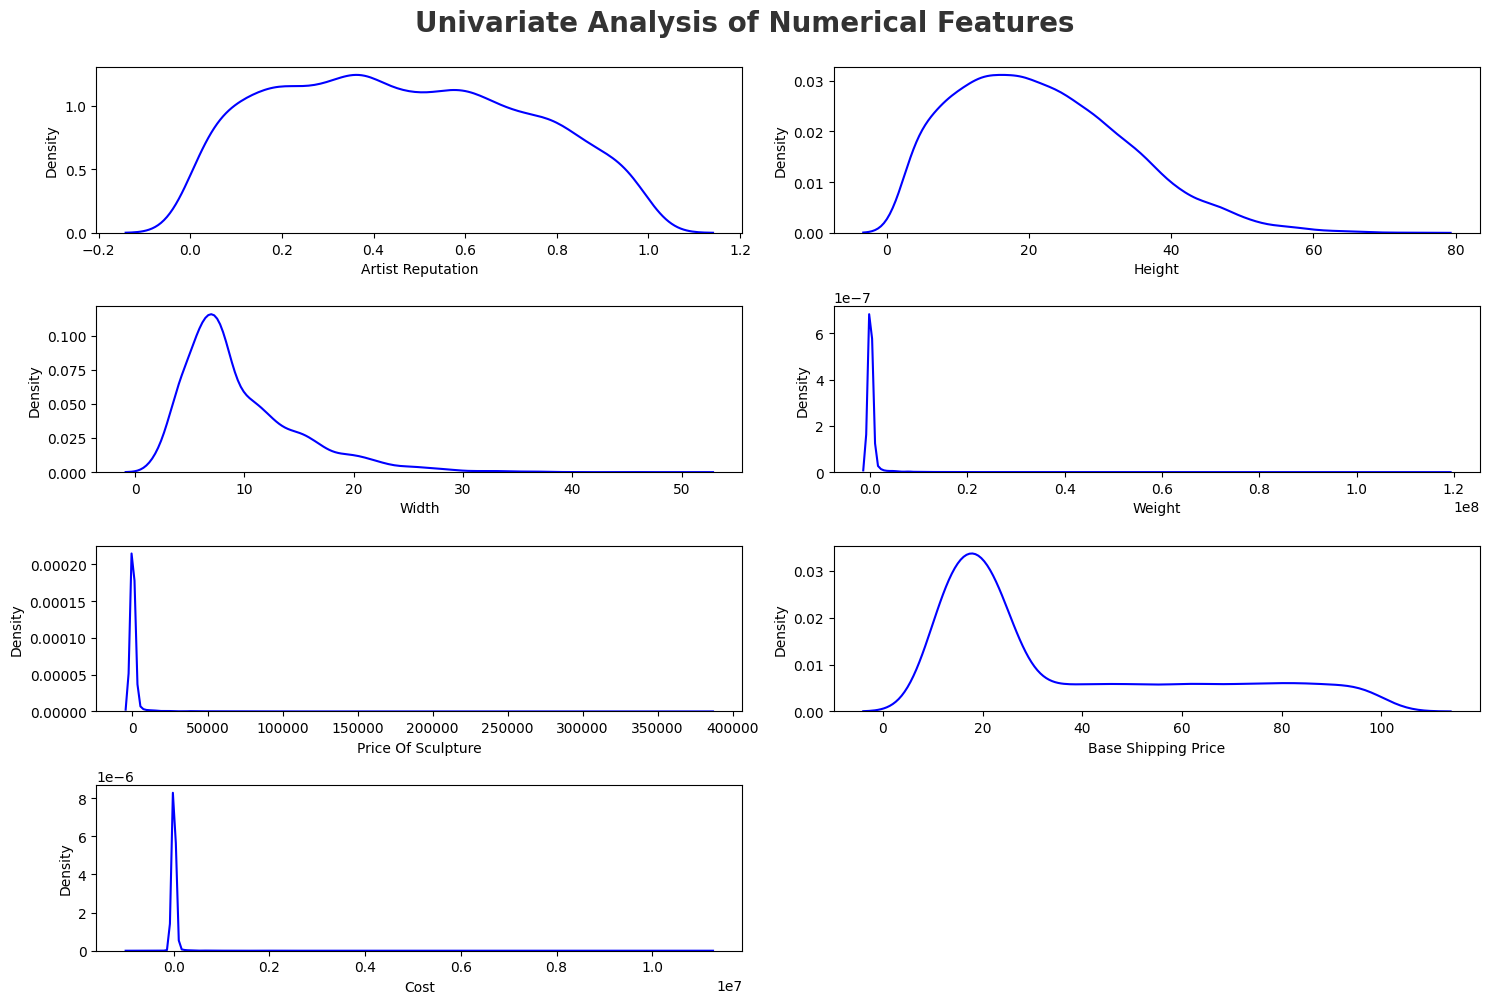

In [10]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

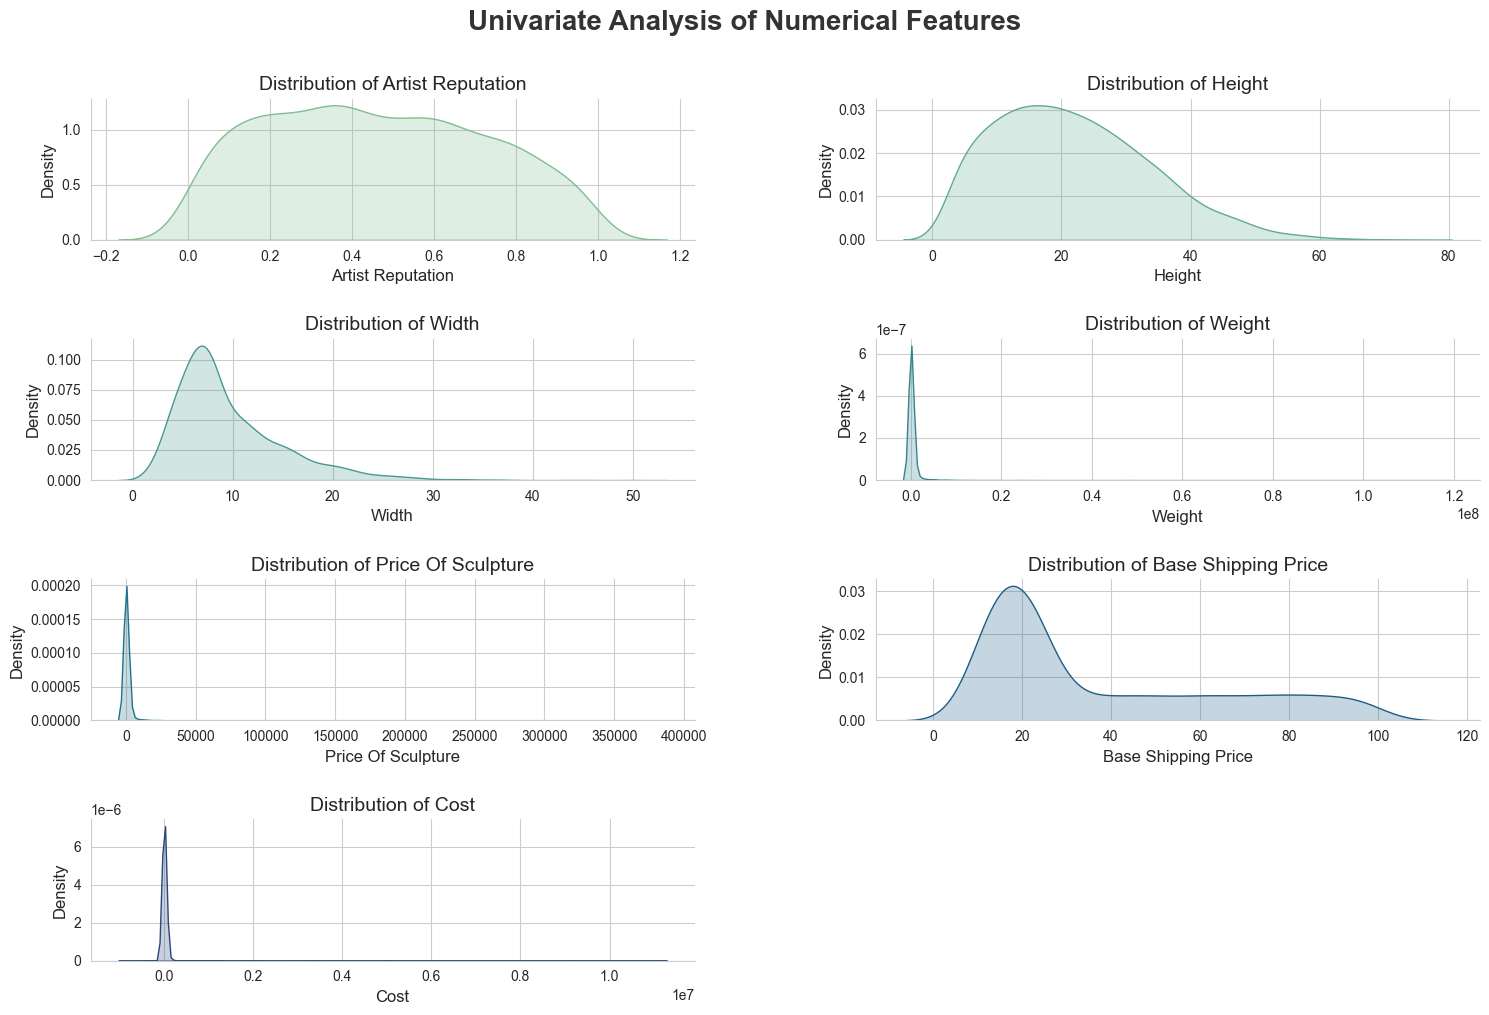

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.01)

rows = int(np.ceil(len(numeric_features) / 2))  # Dynamic row calculation
cols = 2

palette = sns.color_palette("crest", len(numeric_features)) 
sns.set_style("whitegrid")

for i, feature in enumerate(numeric_features):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(x=df[feature], color=palette[i], fill=True, bw_adjust=1.2) 

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'Distribution of {feature}', fontsize=14)
    sns.despine()

plt.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.3) 
plt.show()


<font size=3>**Report**</font> 

* <font size=3> `Height`, `Width` and `Base Shipping price` are positively skewed</font> 

* <font size=3>`Weight`, `Price of Sculpture` has many outliers</font> 

### Categorical Features

In [12]:
df.describe(include='object').T

,count,unique,top,freq
Customer Id,6500,6500,fffe3900350033003300,1
Artist Name,6500,6449,John Brown,4
Material,5736,7,Brass,847
International,6500,2,No,4294
Express Shipment,6500,2,No,4365
Installation Included,6500,2,No,3916
Transport,5108,3,Roadways,2064
Fragile,6500,2,No,5461
Customer Information,6500,2,Working Class,4803
Remote Location,5729,2,No,4594


In [13]:
categorical_columns = []
for i in categorical_features:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)
        

Customer Id: 6500
Artist Name: 6449
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1660
Delivery Date: 1664
Customer Location: 6500


* `Customer Id`, `Artist Name`, `Customer location` have 6500 unique values, so they can be dropped

* `Scheduled date` and `Delivery date` needs feature engineering

In [14]:
categorical_columns

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

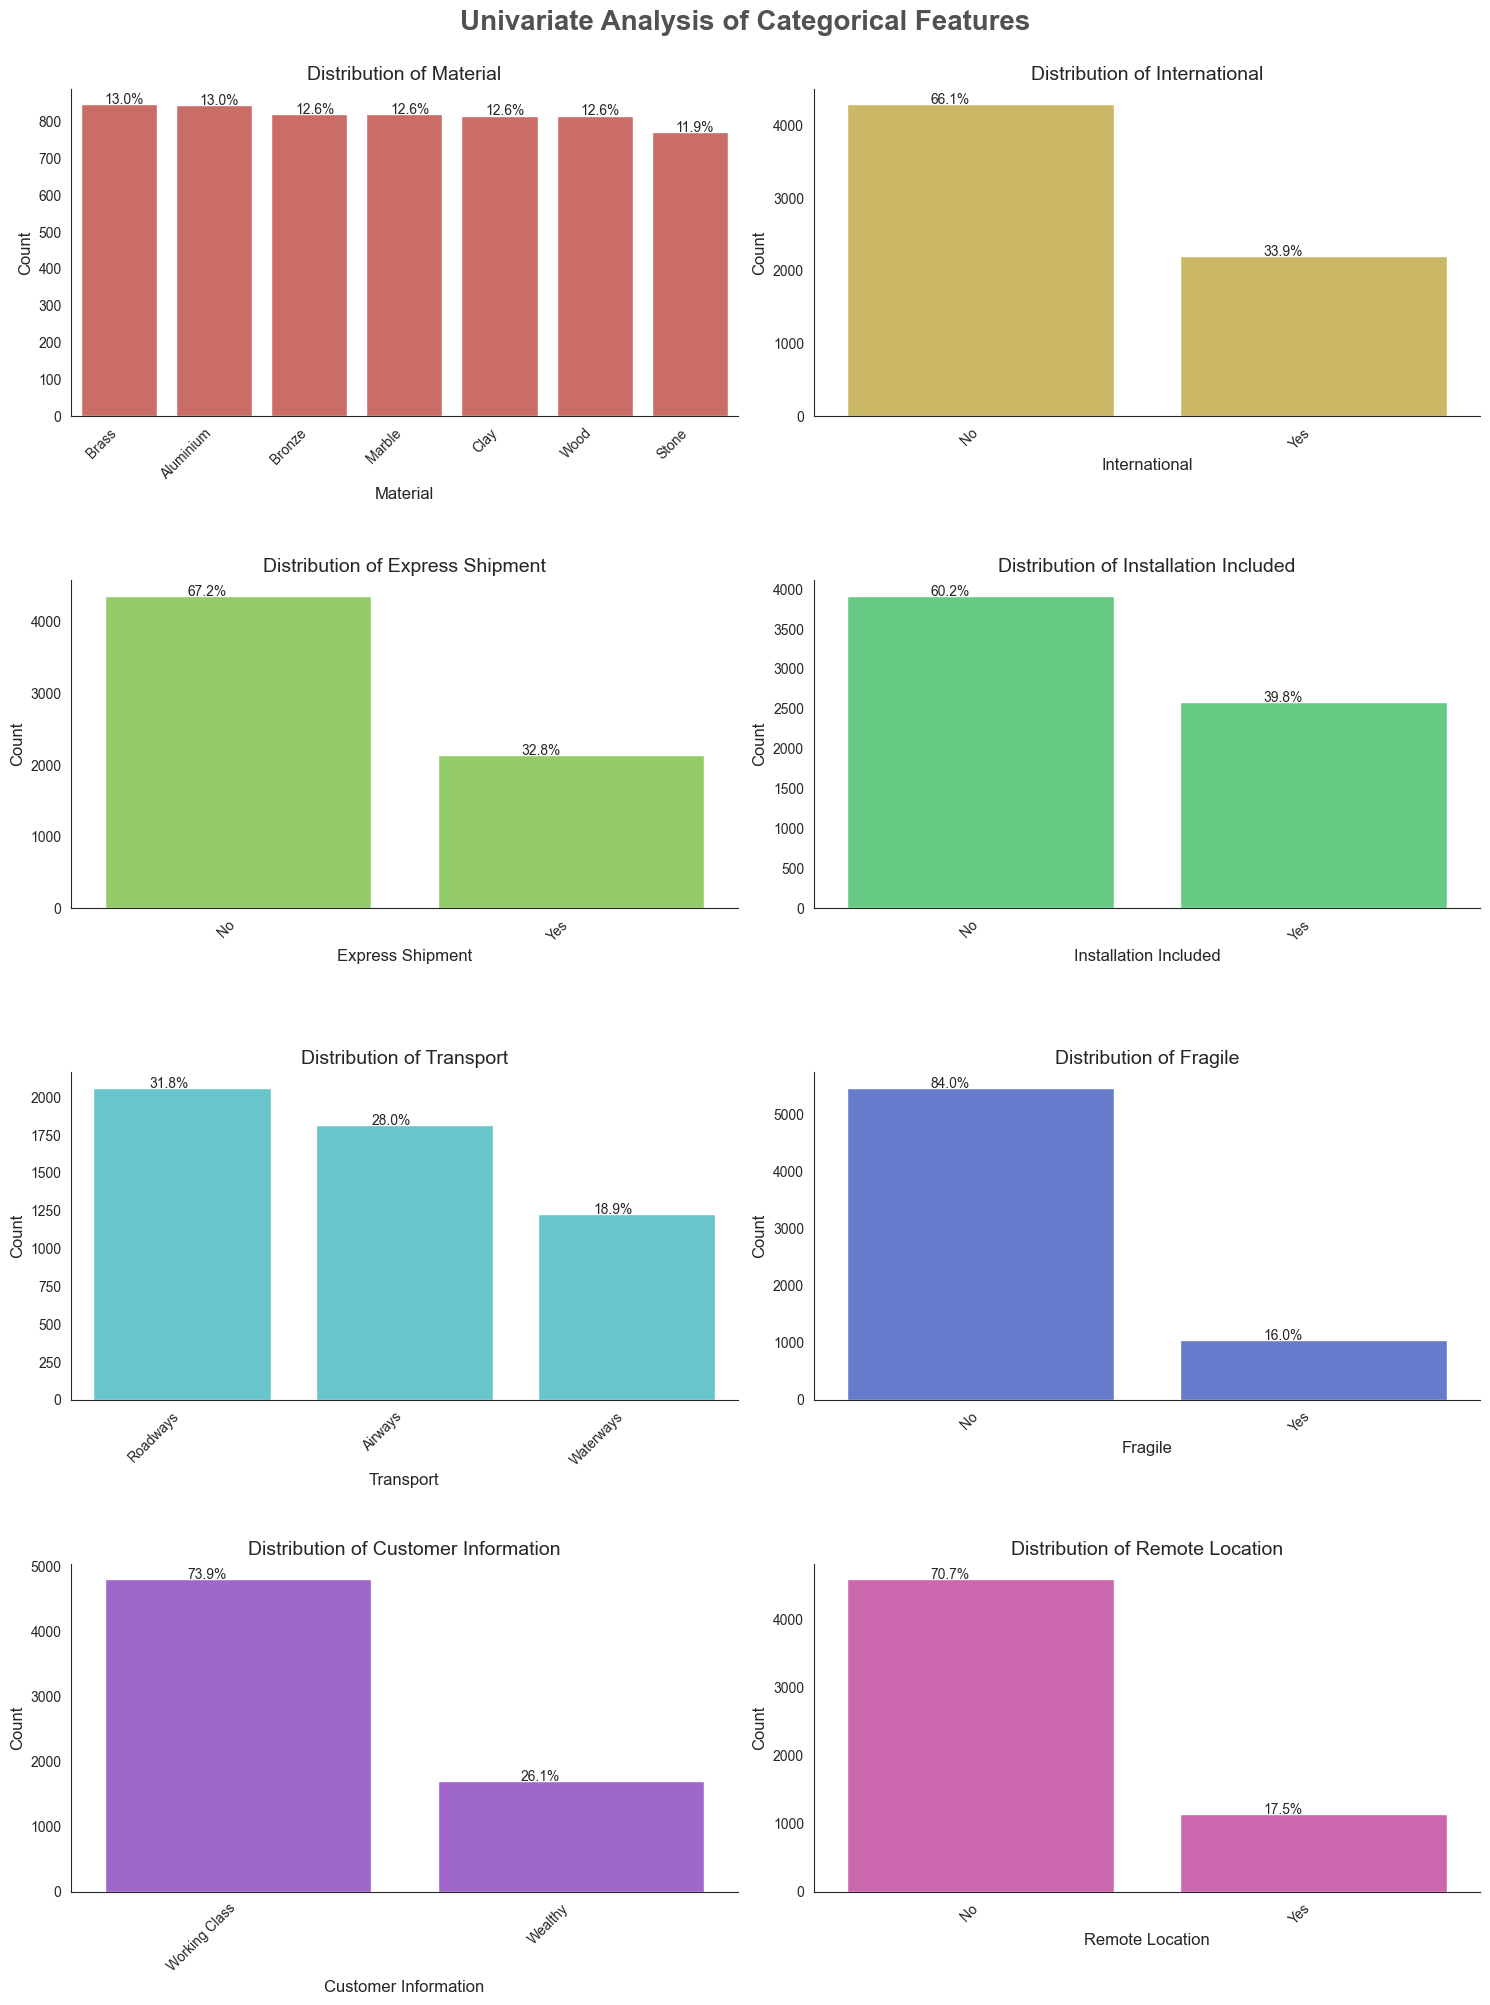

In [15]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)


rows = int(np.ceil(len(categorical_columns) / 2))  # Dynamic row calculation
cols = 2

palette = sns.color_palette("hls", len(categorical_columns))  
sns.set_style("white")

for i, feature in enumerate(categorical_columns):
    plt.subplot(rows, cols, i+1)

    
    value_counts = df[feature].value_counts() 
    order = value_counts.index
    color = palette[i % len(palette)]  # Ensure color cycles through palette if needed
    ax = sns.barplot(x=order, y=value_counts, color=color)

    # Add percentages above each bar
    total = len(df[feature])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.15  
        y = p.get_height() + 0.5
        ax.annotate(percentage, (x, y), size=10)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    sns.despine()  

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  
plt.show()


**Insights** 

* `Material column` has seven unique value, which are almost equally distributed</font> 

* There are 6 bi-variate categorical columns</font> 

<font size=3>**Checking the Null Values in dataset**</font> 


In [16]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [17]:
df.isnull().mean()

Customer Id              0.000000
Artist Name              0.000000
Artist Reputation        0.115385
Height                   0.057692
Width                    0.089846
Weight                   0.090308
Material                 0.117538
Price Of Sculpture       0.000000
Base Shipping Price      0.000000
International            0.000000
Express Shipment         0.000000
Installation Included    0.000000
Transport                0.214154
Fragile                  0.000000
Customer Information     0.000000
Remote Location          0.118615
Scheduled Date           0.000000
Delivery Date            0.000000
Customer Location        0.000000
Cost                     0.000000
dtype: float64

**Insights** 

- There are 7 columns which has null values

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

<font size=4>**Correlation in Numerical Features**</font> 

In [18]:
df.select_dtypes(include='number').columns

Index(['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture',
       'Base Shipping Price', 'Cost'],
      dtype='object')

In [19]:
df[(list(df.select_dtypes(include='number').columns)[1:])].corr()

,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Height,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


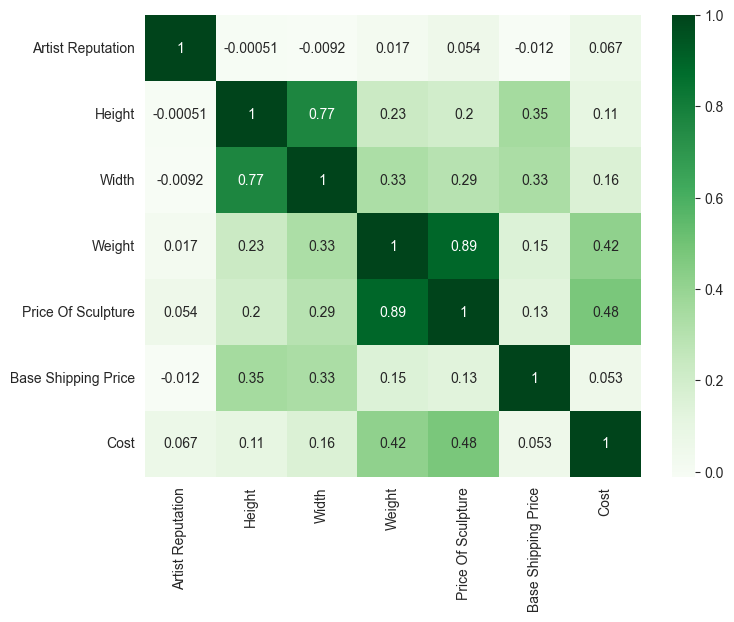

In [20]:
plt.figure(figsize = (8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="Greens", annot=True)
plt.show()

**Insights** 

- There is a high correlation between `Height`-`Width`, and `Weight`-`Price of Sculpture` 


### Relationship between target and numerical columns 

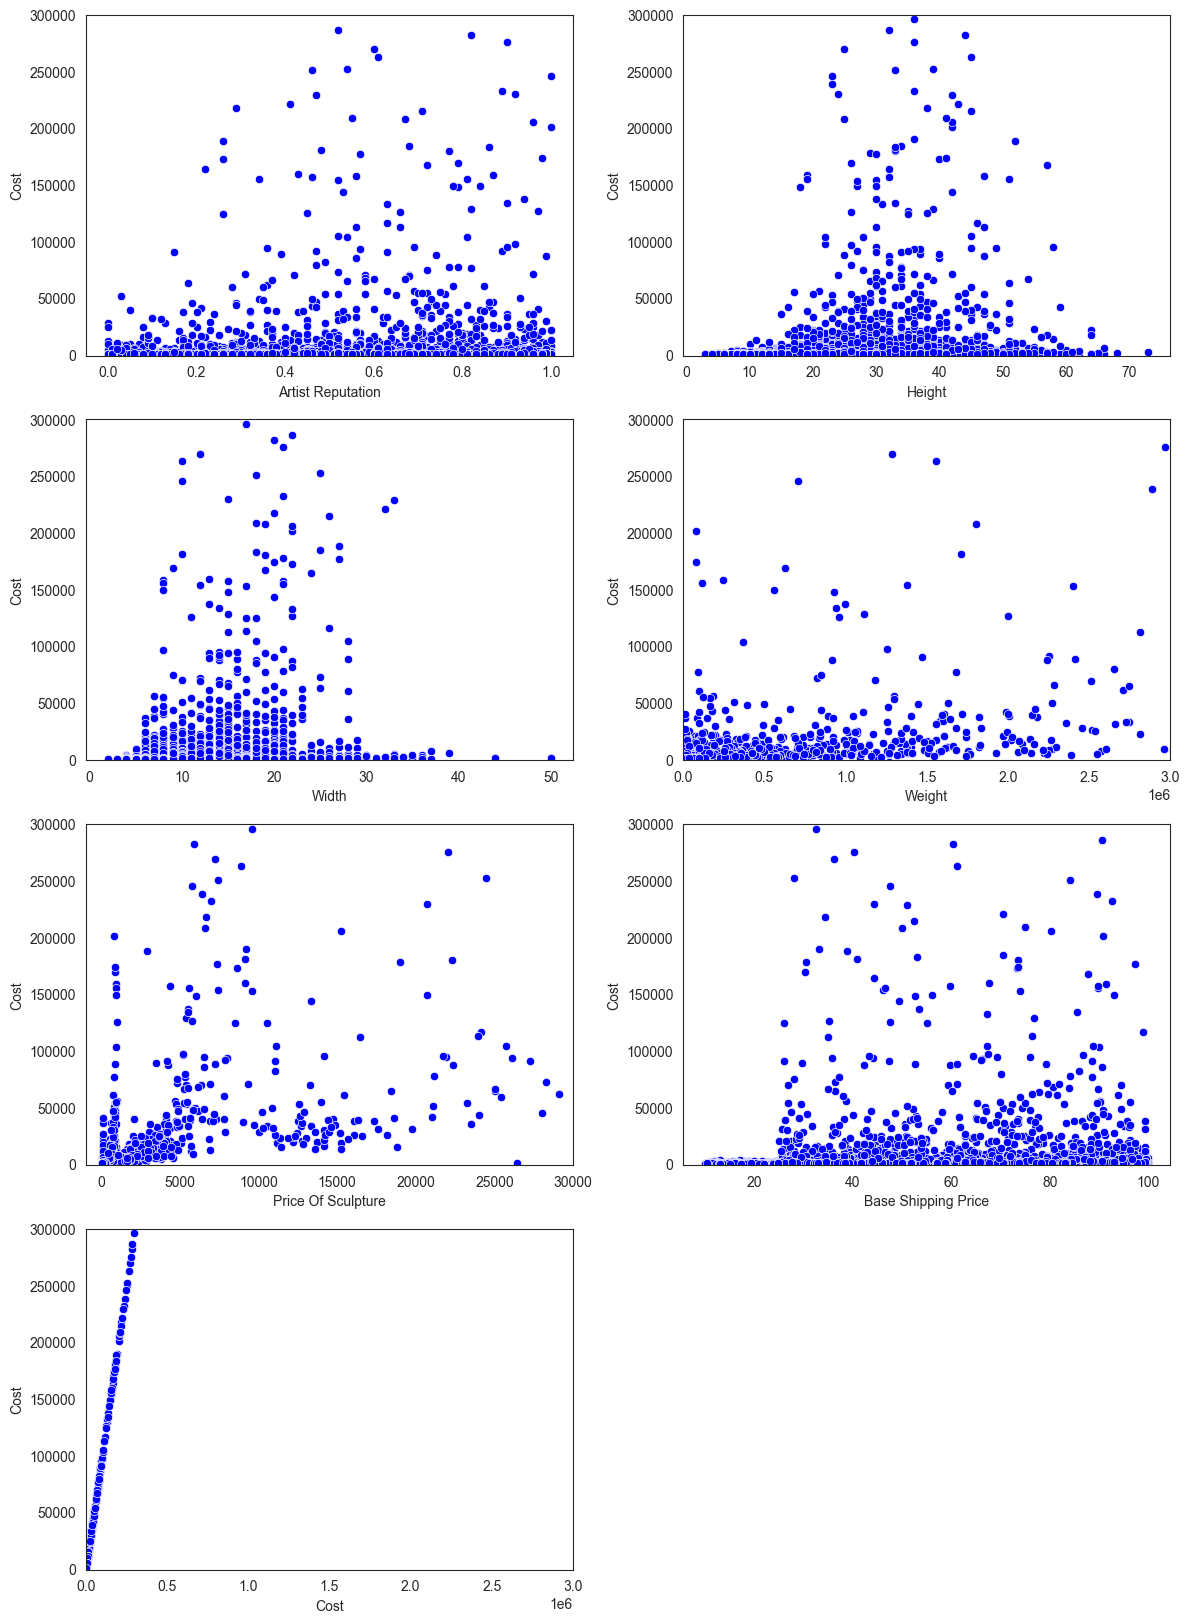

In [21]:
fig = plt.figure(figsize=(12, 24))

for i in range(0, len(numeric_features)):
    ax = plt.subplot(6, 2, i+1)
    sns.scatterplot(data= df ,y=target_feature, x=numeric_features[i], color='b')
    if df[numeric_features[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[numeric_features[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

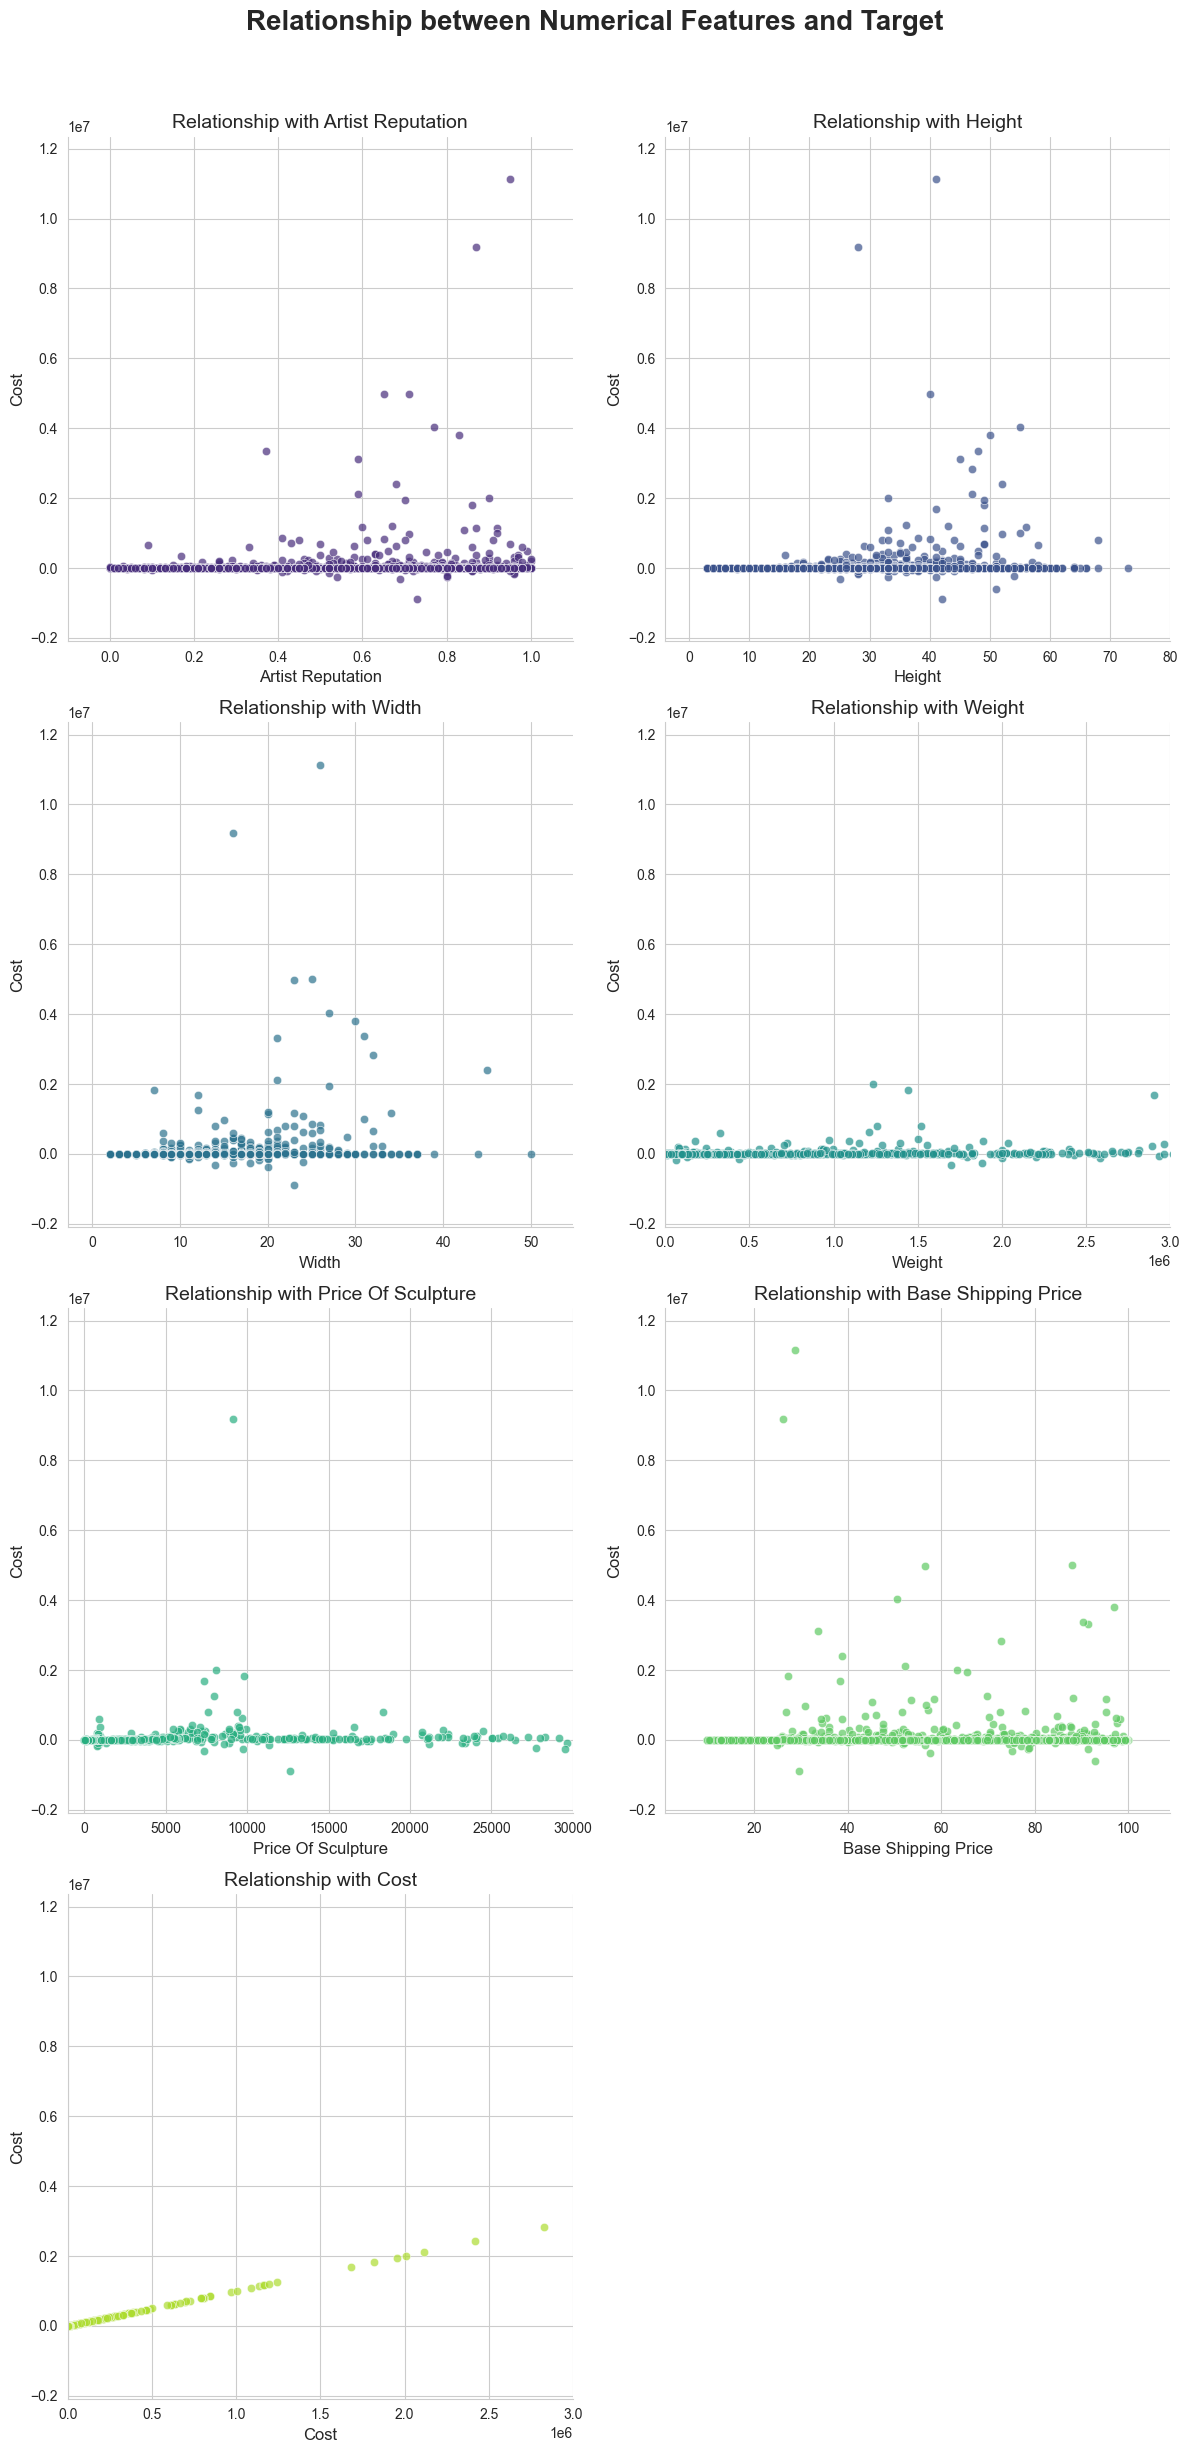

In [22]:
plt.figure(figsize=(12, 24))
plt.suptitle('Relationship between Numerical Features and Target', fontsize=20, fontweight='bold', y=1.02)

palette = sns.color_palette("viridis", len(numeric_features)) 
sns.set_style("whitegrid")  

rows = int(np.ceil(len(numeric_features) / 2))  
cols = 2


for i, feature in enumerate(numeric_features):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(data=df, x=feature, y=target_feature, color=palette[i], alpha=0.7)  
    
    # Dynamic Axis Limits:
    max_x = df[feature].max()
    if max_x > 3000000:
        plt.xlim(-1000, 3000000)
    elif max_x > 30000:
        plt.xlim(-1000, 30000)
    else:
        x_range = max_x - df[feature].min()
        plt.xlim(df[feature].min() - 0.1 * x_range, max_x + 0.1 * x_range)

    # Y-Axis Limits for Consistency:
    y_range = df[target_feature].max() - df[target_feature].min()
    plt.ylim(df[target_feature].min() - 0.1 * y_range, df[target_feature].max() + 0.1 * y_range)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target_feature, fontsize=12)
    plt.title(f'Relationship with {feature}', fontsize=14)
    sns.despine(left=False, bottom=False) 


plt.tight_layout()
plt.show()


**Insights** 

- We can observe that there seems to be very low linear relationship between the independent and dependent features

- There seems to be linear relationship between Price of sculpture and the target column

## Visualizing Independent columns

<font size=3>**Target Feature**</font> 


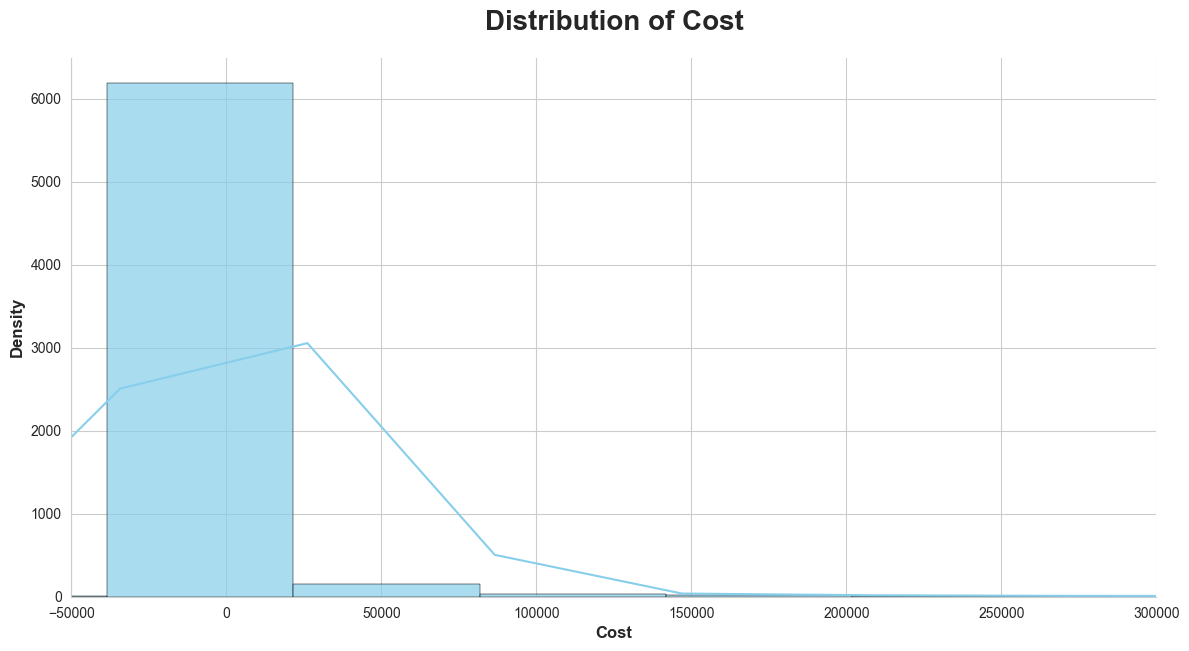

In [23]:
plt.figure(figsize=(14, 7))  

sns.histplot(df[target_feature], bins=200, kde=True, color="skyblue", alpha=0.7, edgecolor="black")

plt.title(f"Distribution of {target_feature}", fontsize=20, weight="bold", pad=20)  
plt.ylabel("Density", fontsize=12, weight="bold")  
plt.xlabel(f"{target_feature}", fontsize=12, weight="bold") 

plt.xlim(-50000,300000)
sns.despine()
plt.show()


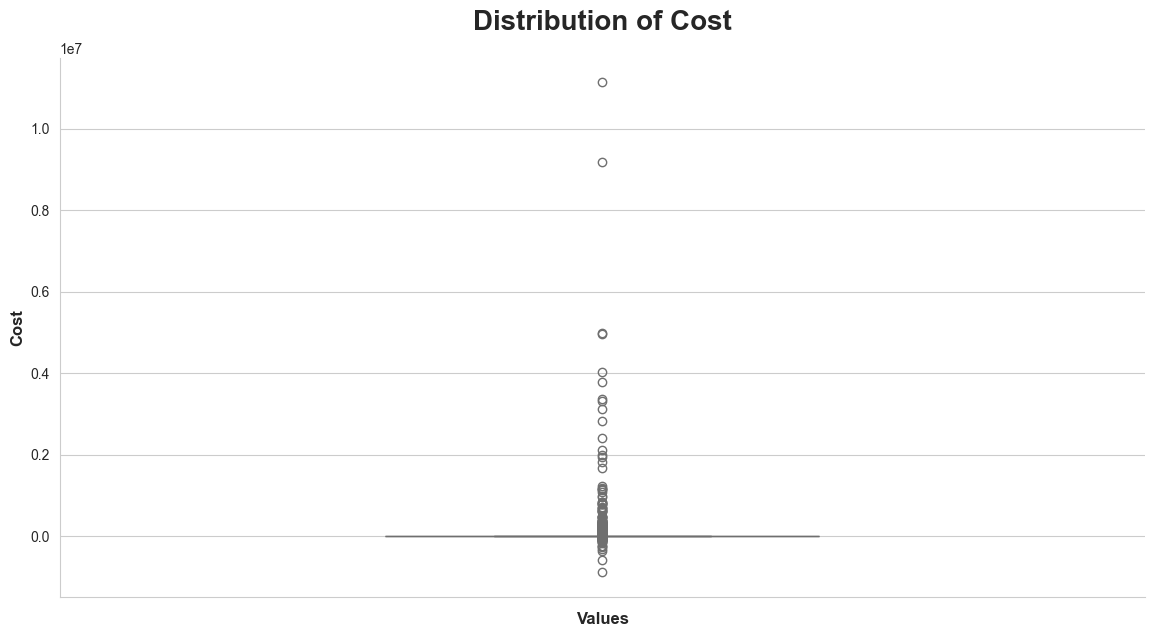

In [24]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.boxplot(y=df[target_feature], color="skyblue", width=0.4) 

plt.title(f"Distribution of {target_feature}", fontsize=20, weight="bold", pad=20)  
plt.ylabel(target_feature, fontsize=12, weight="bold") 
plt.xlabel("Values", fontsize=12, weight="bold") 

max_value = df[target_feature].max()
min_value = df[target_feature].min()
y_range = max_value - min_value
plt.ylim(min_value - 0.05 * y_range, max_value + 0.05 * y_range)  # 5% padding on both sides

sns.despine()
plt.show()


**Insights** 

- There are outliers in the target feature and we need to transform

<font size=3>**How shipment type is affecting cost of shipment?**</font> 


In [25]:
international = df.groupby('International')[target_feature].median()
international

International
No     368.780
Yes    412.695
Name: Cost, dtype: float64

In [26]:
df_plot = pd.DataFrame({'Shipment Type': international.index, 'Median Cost': international.values, 'hue': international.index})
df_plot

,Shipment Type,Median Cost,hue
0,No,368.780,No
1,Yes,412.695,Yes


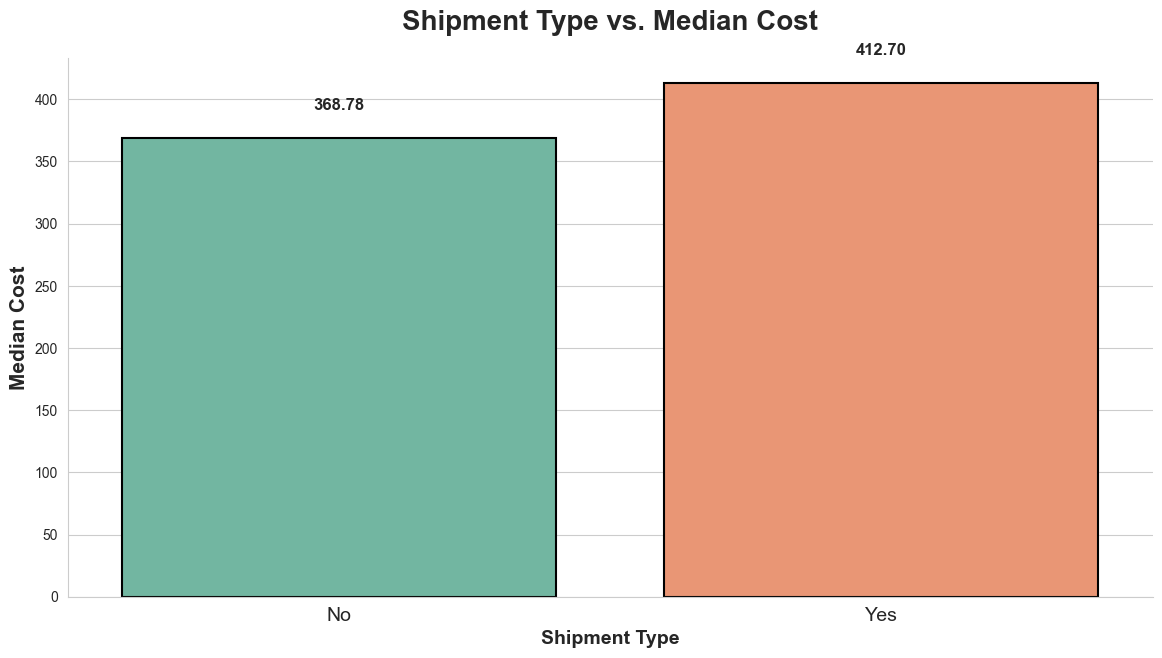

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate median target_feature by International
international = df.groupby('International')[target_feature].median()

df_plot = pd.DataFrame({'Shipment Type': international.index, 'Median Cost': international.values, 'hue': international.index})

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

ax = sns.barplot(data=df_plot, x='Shipment Type', y='Median Cost', hue='hue', dodge=False, palette=colors, edgecolor='black', linewidth=1.5)  
plt.xticks(rotation=0, fontsize=14)

legend = ax.get_legend()
if legend is not None:
    legend.remove()

for bar in ax.patches:
    height = bar.get_height()
    label_text = f'{height:.2f}'
    label_x_pos = bar.get_x() + bar.get_width() / 2
    label_y_pos = height + 0.05 * max(international.values)
    ax.text(label_x_pos, label_y_pos, label_text, ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title(f'Shipment Type vs. Median {target_feature}', fontsize=20, fontweight='bold', pad=20)
plt.ylabel(f'Median {target_feature}', fontsize=15, weight='bold')
plt.xlabel('Shipment Type', fontsize=14, weight='bold')

sns.despine()
plt.show()


In [75]:
df['International'].value_counts()

International
No     4294
Yes    2206
Name: count, dtype: int64

In [50]:
is_international = df['International'] == 'Yes'
international_median = df.loc[is_international, 'Cost'].median()
domestic_median = df.loc[~is_international, 'Cost'].median()

difference = international_median - domestic_median
print(f"The difference between the median shipment price of International and domestic is {difference:.2f}")


The difference between the median shipment price of International and domestic is 43.92


**Insights**

- There is only a difference of 43 in the shipping cost between International and domestic, so it won't affect much at the prediction

- There are much more domestic shipement than international

<font size=3>**How Express Shipment is affecting cost of shipment?**</font> 


In [34]:
df.groupby('Express Shipment')[target_feature].median().reset_index()

,Express Shipment,Cost
0,No,354.71
1,Yes,437.79


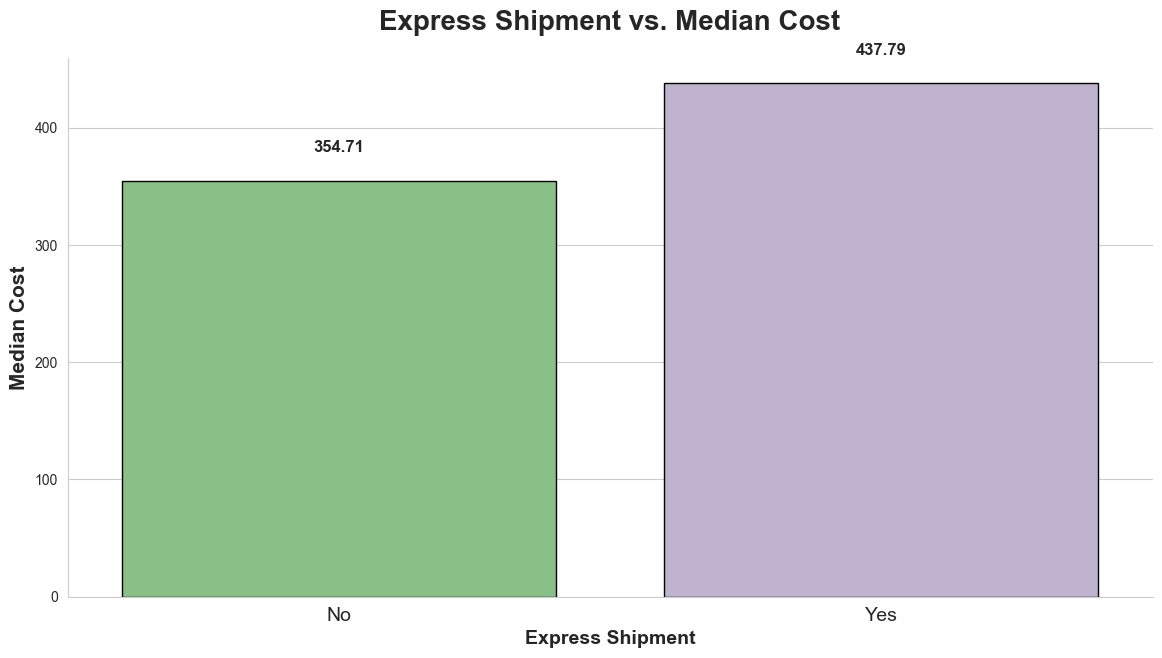

In [41]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")  

express_ship = df.groupby('Express Shipment')[target_feature].median().reset_index()

colors = sns.color_palette("Accent", n_colors=len(express_ship))  

ax = sns.barplot(data=express_ship, x='Express Shipment', y="Cost", hue="Express Shipment",palette=colors, edgecolor='black', linewidth=1)
plt.xticks(rotation=0, fontsize=14)

# Add Value Labels:
for bar in ax.patches:
    height = bar.get_height()
    label_text = f'{height:.2f}'  
    label_x_pos = bar.get_x() + bar.get_width() / 2
    label_y_pos = height + 0.05 * max(express_ship[target_feature]) 
    ax.text(label_x_pos, label_y_pos, label_text, ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title(f'Express Shipment vs. Median {target_feature}', fontsize=20, fontweight='bold', pad=20)
plt.ylabel(f'Median {target_feature}', fontsize=15, weight='bold')
plt.xlabel('Express Shipment', fontsize=14, weight='bold')

sns.despine() 
plt.show()


In [42]:
df['Express Shipment'].value_counts()

Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

In [52]:
is_express_shipment = df['Express Shipment'] == 'Yes'
fast_shipment = df.loc[is_express_shipment,"Cost"].median()
normal_shipment = df.loc[~is_express_shipment,"Cost"].median()
print(f"The difference between the median shipment price of express shipment and normal shipment is {fast_shipment-normal_shipment:.2f}")

The difference between the median shipment price of express shipment and normal shipment is 83.08


**Insights**

- In express shipment also, there is only a difference of 83 in the shipping cost between International and domestic, so it won't affect much at the prediction

- It's obvious that there are more normal delivery than express 

<font size=3>**How Installation included or not is affecting cost of shipment?**</font> 


C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\2928665443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")


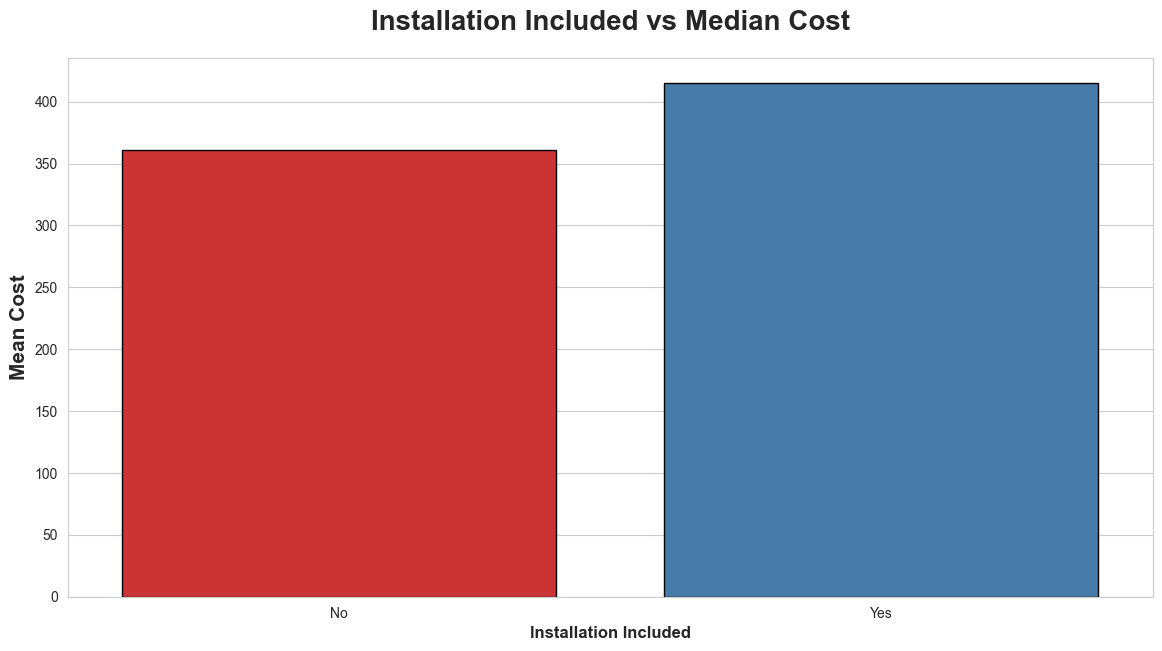

In [53]:
installation = df.groupby('Installation Included')[target_feature].median()
installation.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")
plt.title("Installation Included vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Installation Included", weight="bold", fontsize=12)
plt.show()

In [55]:
df.groupby('Installation Included')[target_feature].median().reset_index()

,Installation Included,Cost
0,No,361.155
1,Yes,414.830


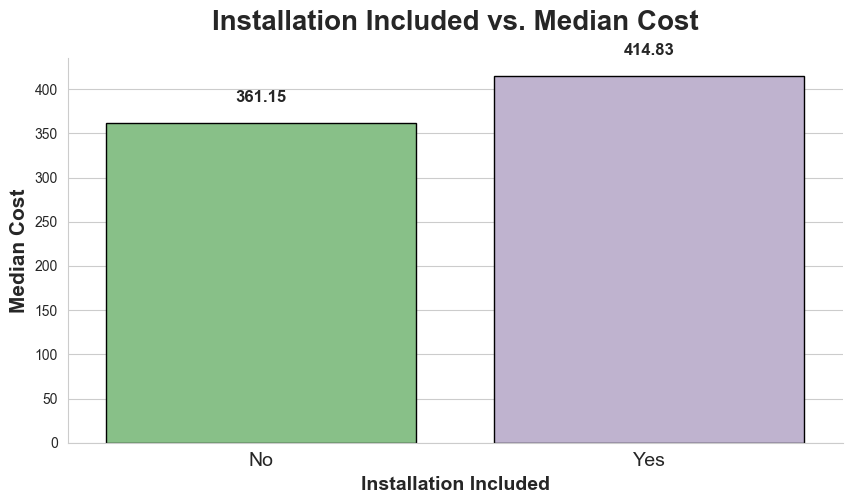

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

installation = df.groupby('Installation Included')[target_feature].median().reset_index()

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")  
colors = sns.color_palette("Accent", n_colors=len(installation))  

ax = sns.barplot(data=installation, x='Installation Included', y="Cost", 
                 palette=colors,hue='Installation Included', edgecolor='black', linewidth=1)
plt.xticks(rotation=0, fontsize=14)

# Add Value Labels:
for bar in ax.patches:
    height = bar.get_height()
    label_text = f'{height:.2f}'  
    label_x_pos = bar.get_x() + bar.get_width() / 2
    label_y_pos = height + 0.05 * max(installation[target_feature])  
    ax.text(label_x_pos, label_y_pos, label_text, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and Labels:
plt.title(f'Installation Included vs. Median {target_feature}', fontsize=20, fontweight='bold', pad=20)
plt.ylabel(f'Median {target_feature}', fontsize=15, weight='bold')
plt.xlabel('Installation Included', fontsize=14, weight='bold')


sns.despine()
plt.show()


In [59]:
df['Installation Included'].value_counts()

Installation Included
No     3916
Yes    2584
Name: count, dtype: int64

In [61]:
installation_needed_median = df[df['Installation Included'] == 'Yes']['Cost'].median()
installation_not_needed_median = df[df['Installation Included'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Installation Included and not is {installation_needed_median-installation_not_needed_median:.2f}")

The difference between the median shipment price of Installation Included and not is 53.68


**Insights** 

- There is only a difference of 53 which won't make much a difference at the time of prediction

- We can see that the charges for not installation is less and values are more, which says that a business should try to take contract which requires installation

<font size=3>**How Fragile Cost is affecting cost of shipment?**</font> 


C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\1726341443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")


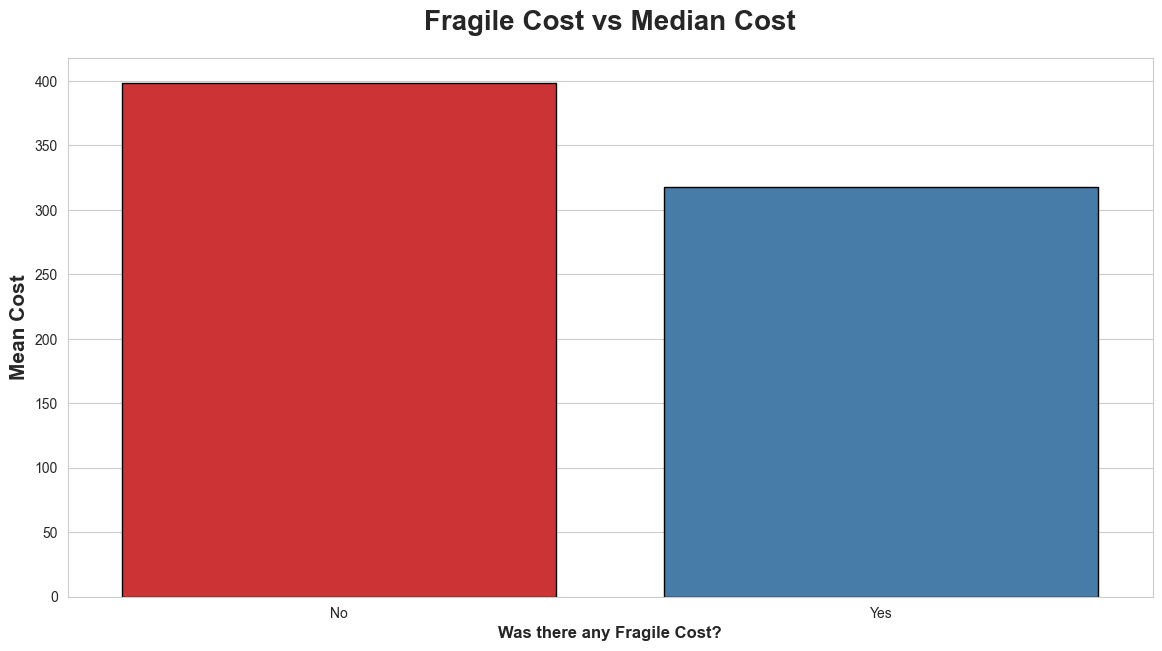

In [62]:
fragile = df.groupby('Fragile')[target_feature].median()
fragile.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")
plt.title("Fragile Cost vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was there any Fragile Cost?", weight="bold", fontsize=12)
plt.show()

In [64]:
df.groupby('Fragile')[target_feature].median().reset_index()

,Fragile,Cost
0,No,397.99
1,Yes,317.96


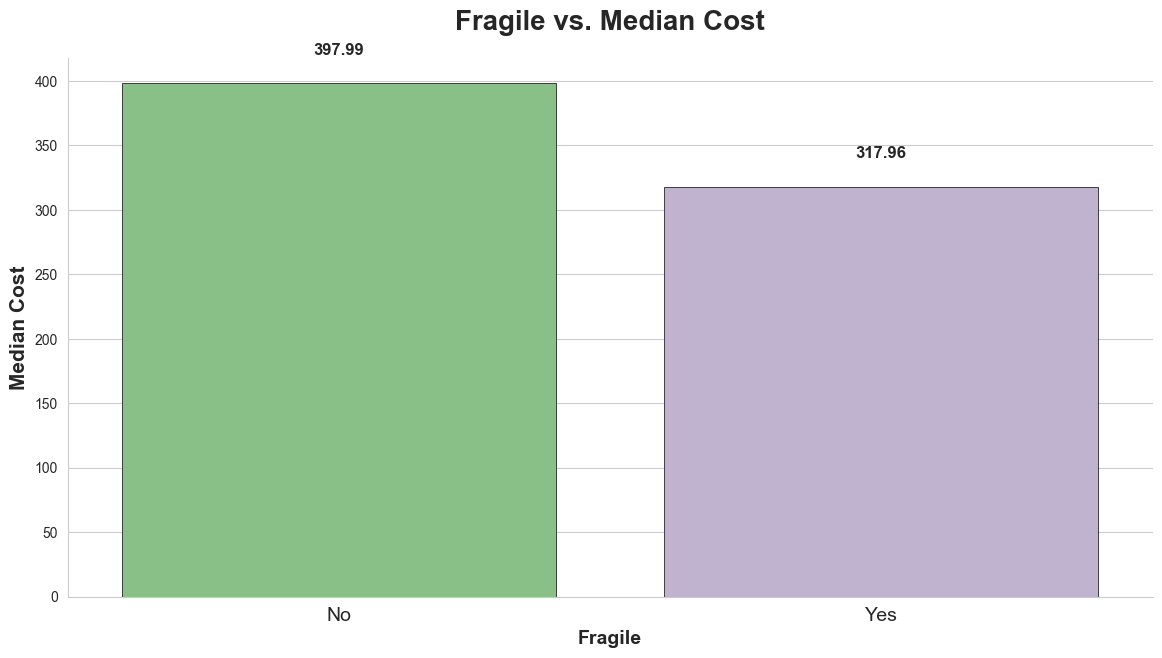

In [66]:
fragile = df.groupby('Fragile')[target_feature].median().reset_index()

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
colors = sns.color_palette("Accent", n_colors=len(fragile)) 

ax = sns.barplot(data=fragile, x='Fragile', y="Cost", palette=colors,hue="Fragile", edgecolor='black', linewidth=0.5)
plt.xticks(rotation=0, fontsize=14)

for bar in ax.patches:
    height = bar.get_height()
    label_text = f'{height:.2f}' 
    label_x_pos = bar.get_x() + bar.get_width() / 2
    label_y_pos = height + 0.05 * max(fragile[target_feature])
    ax.text(label_x_pos, label_y_pos, label_text, ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title(f'Fragile vs. Median {target_feature}', fontsize=20, fontweight='bold', pad=20)
plt.ylabel(f'Median {target_feature}', fontsize=15, weight='bold')
plt.xlabel('Fragile', fontsize=14, weight='bold')


sns.despine()
plt.show()


In [68]:
fragile_median = df[df['Fragile'] == 'Yes']['Cost'].median()
fragile_not_median = df[df['Fragile'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Fragile cost and non-fragile cost is {abs(fragile_median-fragile_not_median)}")

The difference between the median shipment price of Fragile cost and non-fragile cost is 80.03000000000003


**Insights**

- There is only a difference of -80 which says that the median cost is more if there is no fragile cost and because the number is small it won't make much of a difference at the time of training model

<font size=3>**How delivery location is affecting cost of shipment?**</font> 


C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\501147959.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")


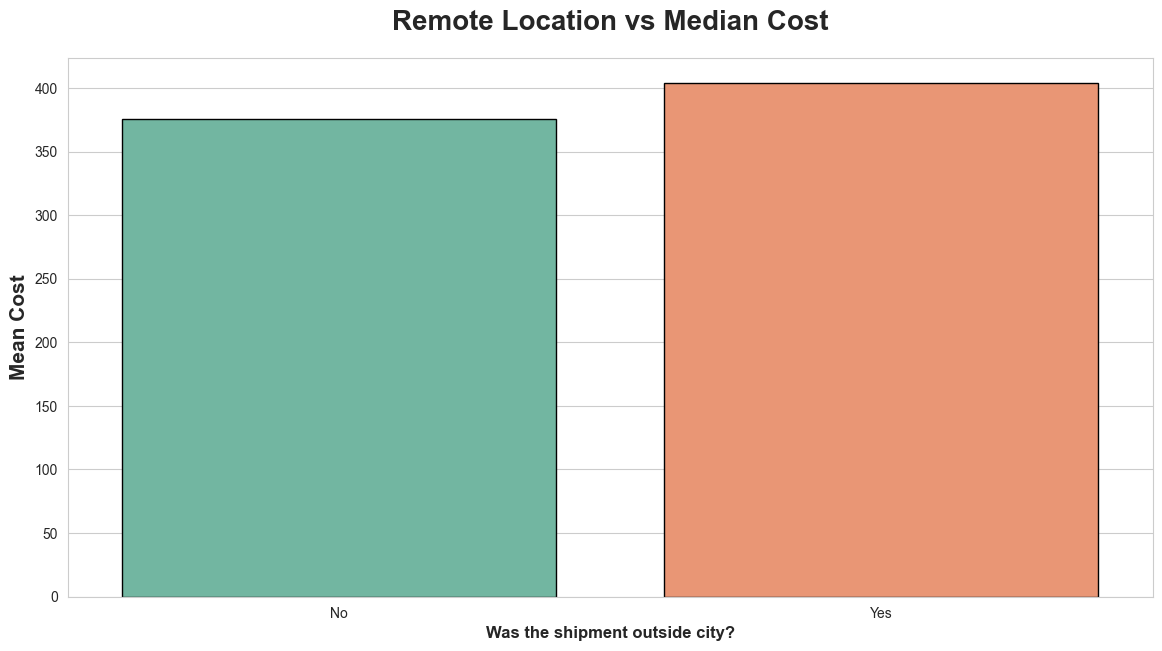

In [69]:
remote = df.groupby('Remote Location')[target_feature].median()
remote.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")
plt.title("Remote Location vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was the shipment outside city?", weight="bold", fontsize=12)
plt.show()

In [70]:
df.groupby('Remote Location')[target_feature].median().reset_index()

,Remote Location,Cost
0,No,376.085
1,Yes,403.800


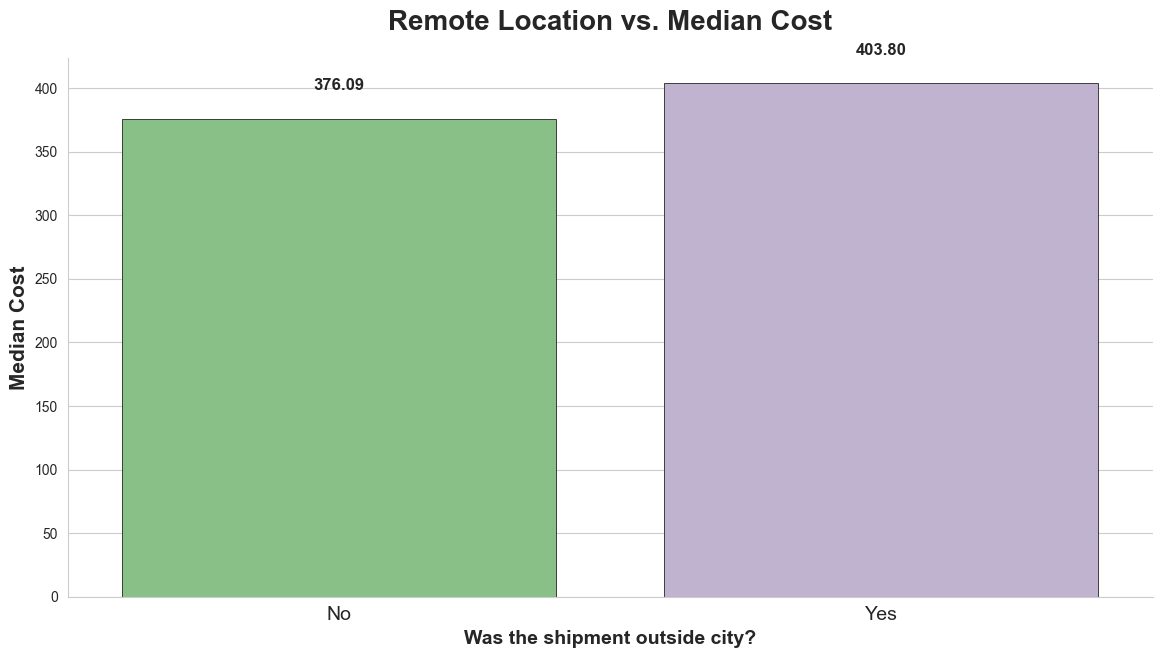

In [71]:
remote = df.groupby('Remote Location')[target_feature].median().reset_index()

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
colors = sns.color_palette("Accent", n_colors=len(remote))

ax = sns.barplot(data=remote, x='Remote Location', y="Cost", palette=colors,hue="Remote Location", edgecolor='black', linewidth=0.5)
plt.xticks(rotation=0, fontsize=14)

for bar in ax.patches:
    height = bar.get_height()
    label_text = f'{height:.2f}'
    label_x_pos = bar.get_x() + bar.get_width() / 2
    label_y_pos = height + 0.05 * max(remote[target_feature])
    ax.text(label_x_pos, label_y_pos, label_text, ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title(f'Remote Location vs. Median {target_feature}', fontsize=20, fontweight='bold', pad=20)
plt.ylabel(f'Median {target_feature}', fontsize=15, weight='bold')
plt.xlabel('Was the shipment outside city?', fontsize=14, weight='bold')
sns.despine()

plt.show()


In [72]:
remote_median = df[df['Remote Location'] == 'Yes']['Cost'].median()
not_remote_median = df[df['Remote Location'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {remote_median-not_remote_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 27.714999999999975


In [73]:
df['Remote Location'].value_counts()

Remote Location
No     4594
Yes    1135
Name: count, dtype: int64

**Insights** 

- There is only a difference of 27 which won't make much a difference at the time of prediction


<font size=3>**How Customer Financial condition is affecting cost of shipment?**</font> 


In [77]:
def plot_median_cost_by_category(df, column_name, target_feature, palette="Accent"):
    """
    This function creates a bar plot showing the median value of the target_feature 
    grouped by the specified categorical column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to group by.
        target_feature (str): The name of the column containing the values to calculate the median from.
        palette (str, optional): The color palette to use. Defaults to "Accent".
    """
    grouped_data = df.groupby(column_name)[target_feature].median().reset_index()

    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")
    colors = sns.color_palette(palette, n_colors=len(grouped_data))

    ax = sns.barplot(data=grouped_data, x=column_name, y=target_feature, palette=colors,hue=column_name, edgecolor='black', linewidth=0.5)
    plt.xticks(rotation=0, fontsize=14)

    # Add Value Labels:
    for bar in ax.patches:
        height = bar.get_height()
        label_text = f'{height:.2f}'
        label_x_pos = bar.get_x() + bar.get_width() / 2
        label_y_pos = height + 0.05 * max(grouped_data[target_feature])
        ax.text(label_x_pos, label_y_pos, label_text, ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.title(f'{column_name} vs. Median {target_feature}', fontsize=20, fontweight='bold', pad=20)
    plt.ylabel(f'Median {target_feature}', fontsize=15, weight='bold')
    plt.xlabel(column_name, fontsize=14, weight='bold')

    sns.despine()
    plt.show()


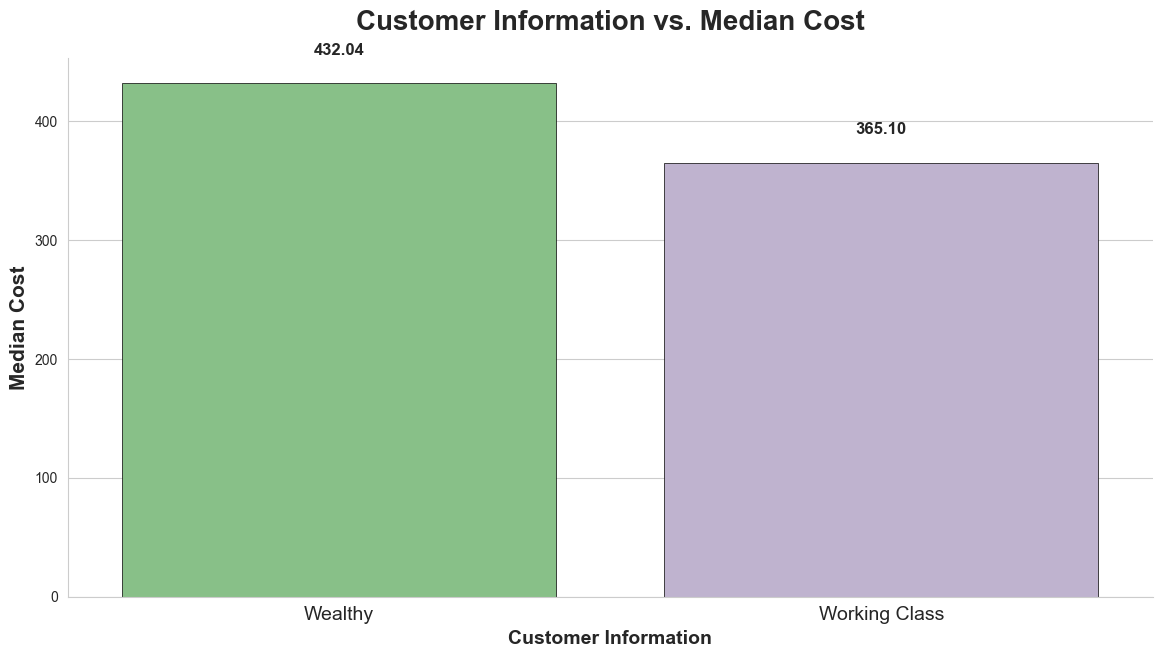

In [78]:
plot_median_cost_by_category(df,"Customer Information",target_feature=target_feature)

In [79]:
customer_info_wealthy_median = df[df['Customer Information'] == 'Wealthy']['Cost'].median()
customer_info_working_class_median = df[df['Customer Information'] == 'Working Class']['Cost'].median()


print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {customer_info_wealthy_median-customer_info_working_class_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 66.94


**Insights**

- There is only a difference of 66 which won't make much a difference at the time of prediction


<font size=3>**Report**</font> 

<font size=3>After understanding relationship between the target column and categorical columns, that there doesn't seem to be much pattern, which model can find in the categorical columns also</font>

## Visualizing date columns


In [85]:
df['Scheduled Date']

0       06/07/15
1       03/06/17
2       03/09/15
3       05/24/15
4       12/18/16
          ...   
6495    03/28/18
6496    08/29/15
6497    04/10/19
6498    03/10/19
6499    12/03/16
Name: Scheduled Date, Length: 6500, dtype: object

In [86]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\3964803925.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\3964803925.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


In [87]:
df['Scheduled Date']

0      2015-06-07
1      2017-03-06
2      2015-03-09
3      2015-05-24
4      2016-12-18
          ...    
6495   2018-03-28
6496   2015-08-29
6497   2019-04-10
6498   2019-03-10
6499   2016-12-03
Name: Scheduled Date, Length: 6500, dtype: datetime64[ns]

In [88]:
df['year'] = pd.DatetimeIndex(df['Scheduled Date']).year
df['month'] = pd.DatetimeIndex(df['Scheduled Date']).month

In [89]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12


In [94]:
df.groupby(["year", "month"])["Cost"].mean()

year  month
2015  1          1243.620800
      2         34249.351818
      3         23775.741185
      4         94668.648276
      5         15884.313833
      6          4480.208318
      7          1426.520159
      8         17085.121760
      9          4258.188871
      10         4979.386768
      11        53043.073800
      12        40081.836509
2016  1         12930.272703
      2         10034.132545
      3         10757.195810
      4          4288.732696
      5          4103.283514
      6         12773.907113
      7          5375.828978
      8         10069.254050
      9         20046.773929
      10        20613.512273
      11         7505.164333
      12         2370.201793
2017  1         13388.419779
      2          3427.163673
      3         41359.835804
      4         26634.491452
      5          8857.153077
      6        121282.754000
      7         36597.400391
      8         -3546.622946
      9          1854.061058
      10        10443.433304
  

In [90]:
x = df.groupby(["year", "month"])["Cost"].mean()
df_wide = x.unstack().T
df_wide.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,1243.620800,12930.272703,13388.419779,47457.768519,2430.550495
2,34249.351818,10034.132545,3427.163673,6612.238687,3840.484630
3,23775.741185,10757.195810,41359.835804,20026.385455,2265.834019
4,94668.648276,4288.732696,26634.491452,4138.730309,8374.422975
5,15884.313833,4103.283514,8857.153077,17461.434118,14129.902741


In [95]:
df_wide[2015]

month
1      1243.620800
2     34249.351818
3     23775.741185
4     94668.648276
5     15884.313833
6      4480.208318
7      1426.520159
8     17085.121760
9      4258.188871
10     4979.386768
11    53043.073800
12    40081.836509
Name: 2015, dtype: float64

In [101]:
df_wide.columns

Index([2015, 2016, 2017, 2018, 2019], dtype='int32', name='year')

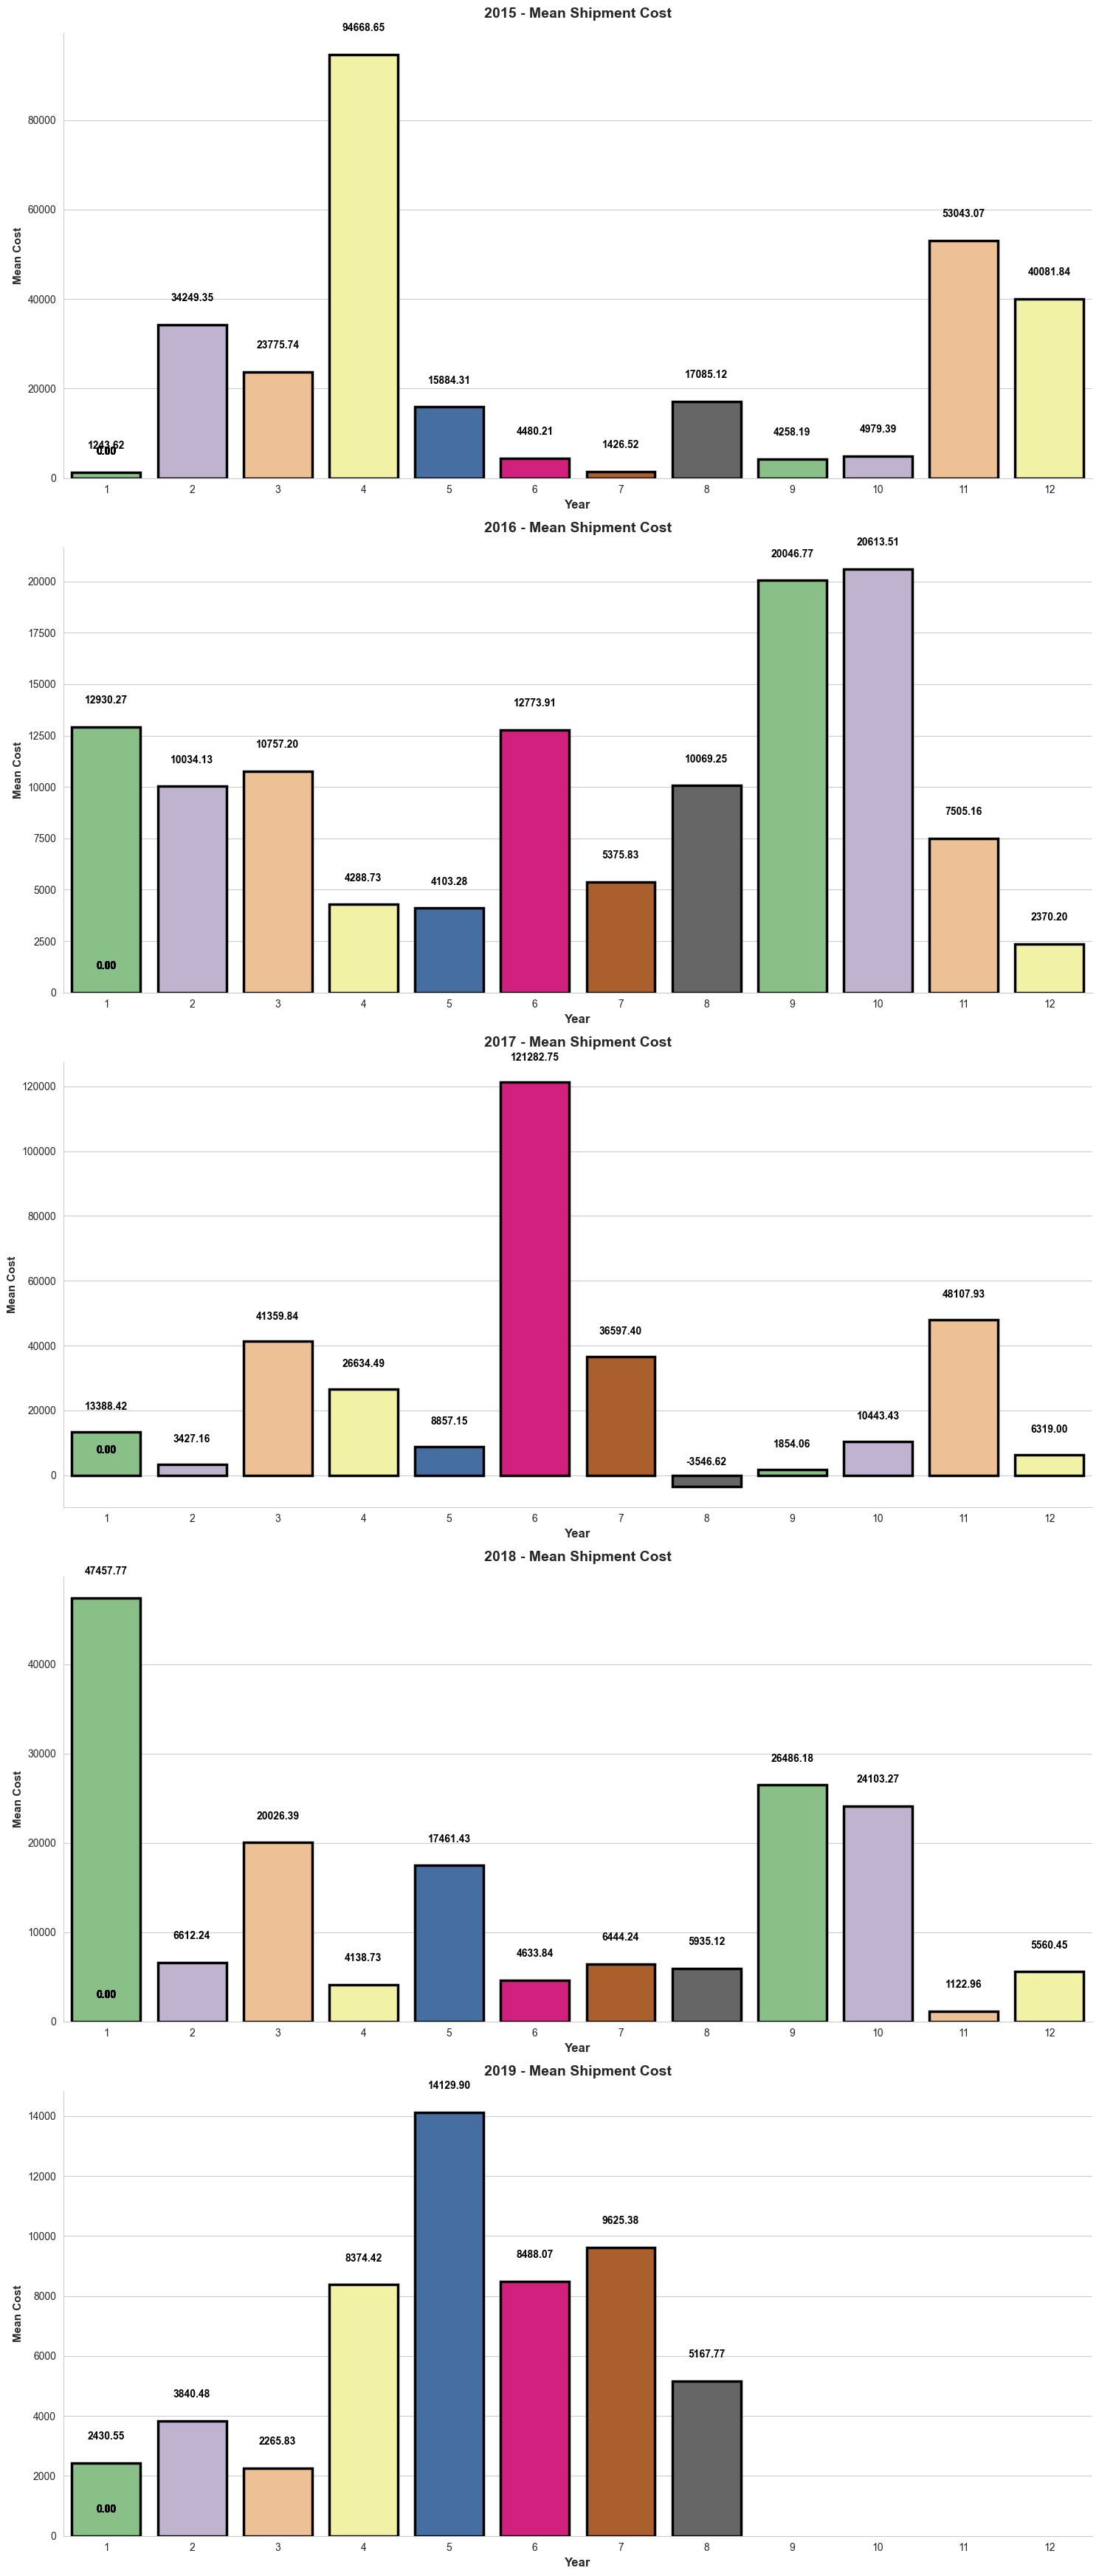

In [106]:

fig = plt.figure(figsize=(15, 7 * len(df_wide.columns)))  
sns.set_style("whitegrid") 

for i, column in enumerate(df_wide.columns):

    ax = fig.add_subplot(len(df_wide.columns), 1, i + 1)


    colors = sns.color_palette("Accent", n_colors=len(df_wide))
    ax=sns.barplot(y=df_wide[column], x=df_wide.index, ax=ax, palette=colors,hue= df_wide.index,edgecolor='black', linewidth=2.5)

    ax.get_legend().remove()

    for bar in ax.patches:
        height = bar.get_height()
        label_text = f'{height:.2f}'
        label_x_pos = bar.get_x() + bar.get_width() / 2
        label_y_pos = height + 0.05 * max(df_wide[column])  # Add a small offset
        ax.text(label_x_pos, label_y_pos, label_text, ha='center', va='bottom', fontsize=10, fontweight='bold', color="black")


    ax.set_title(f"{column} - Mean Shipment Cost", weight="bold", fontsize=14, pad=15)  
    ax.set_ylabel("Mean Cost", weight="bold", fontsize=11)
    ax.set_xlabel("Year", weight="bold", fontsize=12)

    sns.despine()  

plt.tight_layout()
plt.show()


**Insights**
 - Monthly distribution of every year is different
 - For 2015, 2016 and 2018 There were more cost at the start and end of the year.
 - For 2017 and 2019 cost were high mid year.

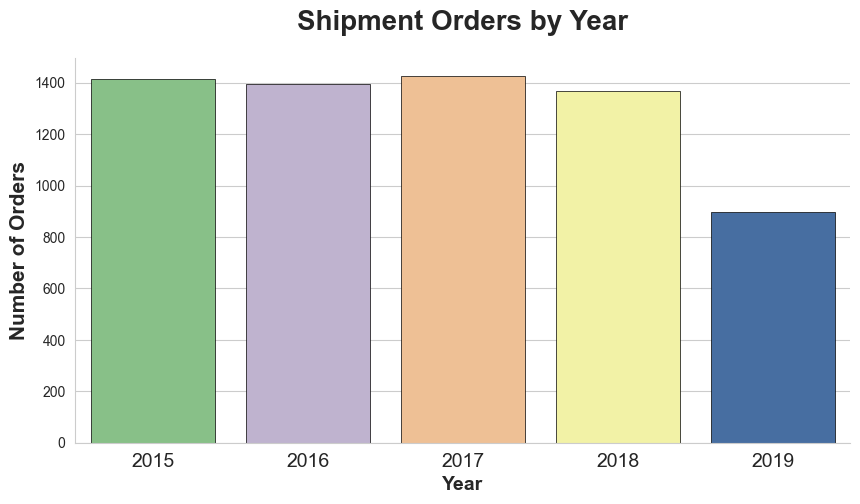

In [115]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

ax = sns.countplot(x='year', data=df, hue='year', dodge=False, palette="Accent", edgecolor='black', linewidth=0.5)
plt.xticks(rotation=0, fontsize=14)

legend = ax.get_legend()
if legend is not None:
    legend.remove()

plt.title(f'Shipment Orders by Year', fontsize=20, fontweight='bold', pad=20)
plt.ylabel('Number of Orders', fontsize=15, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')

sns.despine()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\1846697422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.month,ec = "black", palette="Set2")


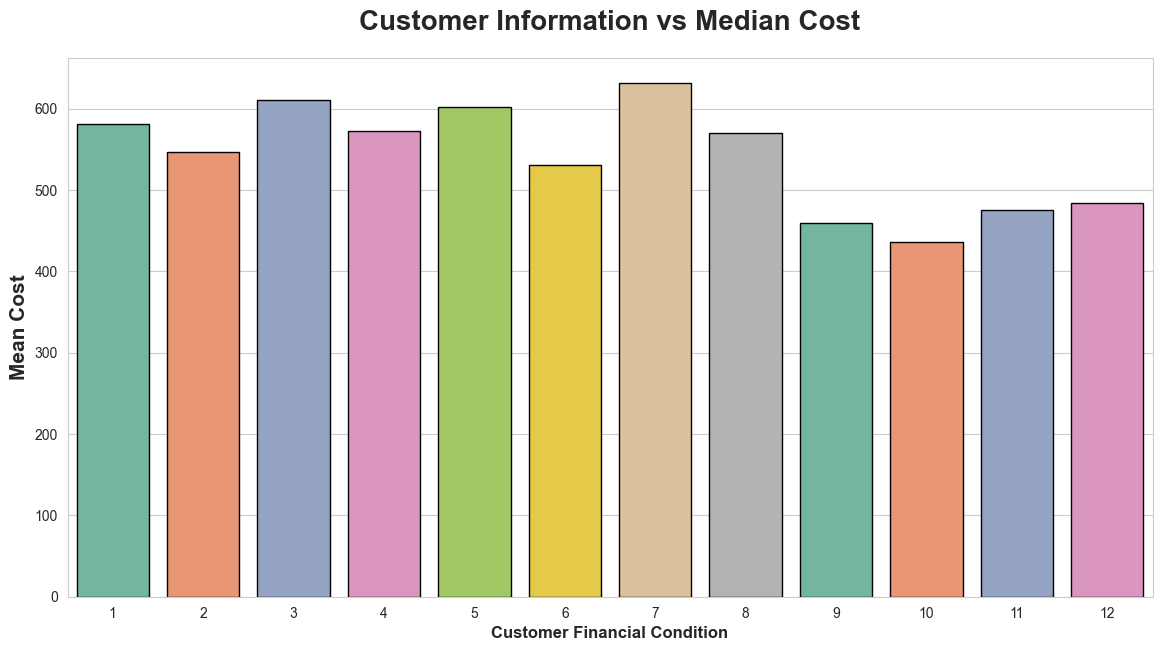

In [116]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.month,ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

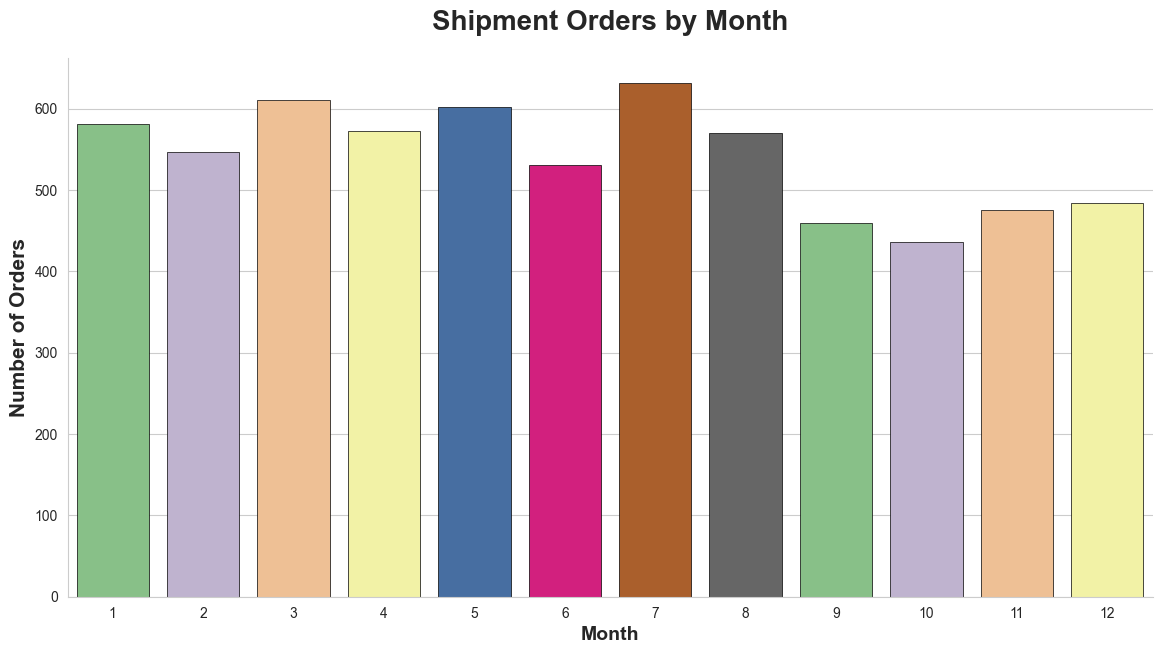

In [125]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

ax = sns.countplot(x='month', data=df, hue='month', dodge=False, palette="Accent", edgecolor='black', linewidth=0.5)
legend = ax.get_legend()
if legend is not None:
    legend.remove()

plt.title('Shipment Orders by Month', fontsize=20, fontweight='bold', pad=20)
plt.ylabel('Number of Orders', fontsize=15, weight='bold')
plt.xlabel('Month', fontsize=14, weight='bold')
sns.despine()

plt.show()


# Final Report


* The `Cost` column is the target to predict.
* The target variable here is continuous.
* There are outliers in some columns we have to remove outliers.
* `date` column should be configured to extract `year` and `month`.
* Null values in `Artist Reputation`, `Height`, `Width`, `Weight`, `Material`, `Transport`, `Remote Location` needs to be handled